In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.datasets import load_iris

# PCA

* 간단한 예제

In [4]:
X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# n_components : 원하는 개수만큼 임의적으로 PC를 추출
pca = PCA(n_components=2)

# 적합 (fitting --> training)
pca.fit(X)

PCA(n_components=2)

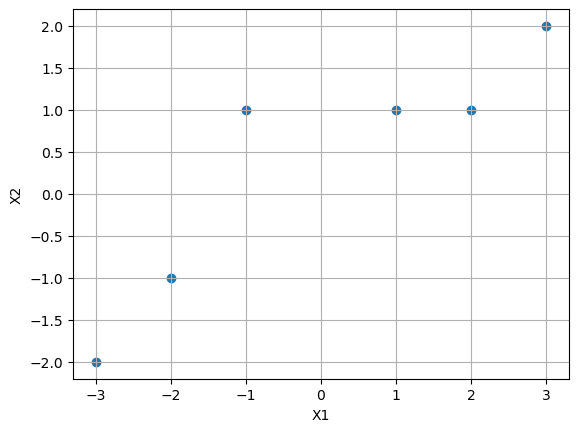

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

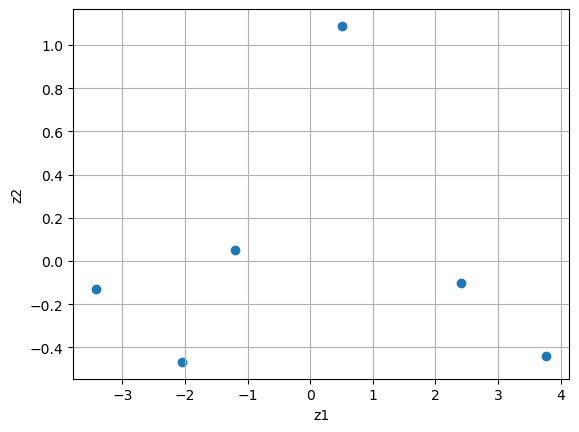

In [7]:
# 비지도학습
z = pca.transform(X)

# feature space에서 pca값 분포
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.grid()
plt.show()

In [9]:
# PC loading vector
# 주성분 : 데이터의 변동성(variance) 설명g하는 직교 성분(pc1, pc2)
# phi = 주성분 행렬 (각 행은 각 주성분을 나타내고, 각 열을 raw feature에 대한 주성분의 가중치를 나타낸다.)
phi = pca.components_
phi

array([[-0.8549662 , -0.51868371],
       [-0.51868371,  0.8549662 ]])

In [11]:
# 첫번째 주성분 (PC1)의 가중치 벡터
print('PC1 :', phi[0])
# -0.8549662 : 첫 번째 feature에 대한 가중치 , -0.51868371 : 두 번째 feature에 대한 가중치
# >> 각 feature는 음(-)의 가중치를 가진다. 첫 번째 feature가 더 큰 영향을 미친다.

# 두 번째 주성분의 가중치 벡터
print('PC2 :', phi[1])
# -0.51868371  0.8549662
# >> 두 번째 feature는 양의 가중치를 가지며 더 큰 영향력을 가진다.

PC1 : [-0.8549662  -0.51868371]
PC2 : [-0.51868371  0.8549662 ]


In [12]:
# 내적
# PCA 직교 분석
# PCA 수행 후, 주성분으로 데이터 변환
# 원래의 값을 "주성분 공간(선)"에 "투사(projection)"하여 차원을 축소
# >> 새로운 주성분 죄표 얻음.
np.matmul(X, phi.T)

array([[ 0.33628249,  1.37364991],
       [ 2.22861612,  0.18240122],
       [ 3.60226603, -0.15388128],
       [-1.37364991,  0.33628249],
       [-2.22861612, -0.18240122],
       [-3.60226603,  0.15388128]])

In [13]:
pca.explained_variance_ratio_

array([0.95864607, 0.04135393])

* 실데이터 분석

In [16]:
# 데이터 준비
iris = load_iris()

X, y = iris.data, iris.target

In [17]:
pca = PCA(n_components=3)

In [18]:
# PC score
z = pca.fit_transform(X)

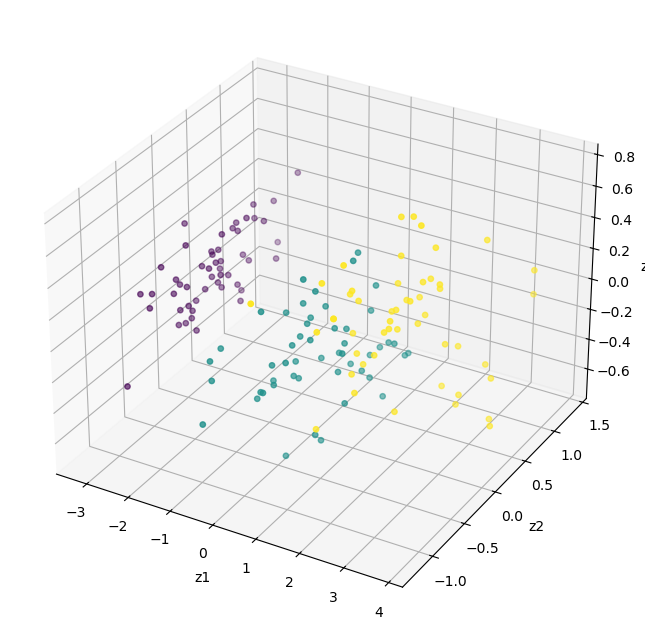

In [20]:
# PC space에서의 데이터 분포 파악
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(z[:, 0], z[:, 1], z[:, 2], c=y, s=15)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')

plt.grid()
plt.show()

In [21]:
# pc loading vector
phi = pca.components_
np.matmul(X, phi.T)

array([[ 2.81823951e+00,  5.64634982e+00, -6.59767544e-01],
       [ 2.78822345e+00,  5.14995135e+00, -8.42316989e-01],
       [ 2.61337456e+00,  5.18200315e+00, -6.13952460e-01],
       [ 2.75702228e+00,  5.00865360e+00, -6.00293343e-01],
       [ 2.77364860e+00,  5.65370709e+00, -5.41773476e-01],
       [ 3.22150550e+00,  6.06828303e+00, -4.63175058e-01],
       [ 2.68182738e+00,  5.23749119e+00, -3.73960558e-01],
       [ 2.87622016e+00,  5.49033754e+00, -6.53732034e-01],
       [ 2.61598240e+00,  4.74864082e+00, -6.11093146e-01],
       [ 2.82960933e+00,  5.21317833e+00, -8.29485441e-01],
       [ 2.99541804e+00,  5.97202148e+00, -7.07170726e-01],
       [ 2.88960990e+00,  5.34168252e+00, -5.29702456e-01],
       [ 2.71625587e+00,  5.09184058e+00, -8.38697147e-01],
       [ 2.27856139e+00,  4.81555799e+00, -5.70553044e-01],
       [ 2.85761474e+00,  6.50571721e+00, -7.83480240e-01],
       [ 3.11632610e+00,  6.66501491e+00, -3.54075813e-01],
       [ 2.87883726e+00,  6.13763209e+00

In [ ]:
# pc값을 찾으면 feature analysis를 이용해 특성 분석을 해야 한다.

In [22]:
# 설명된 분산
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

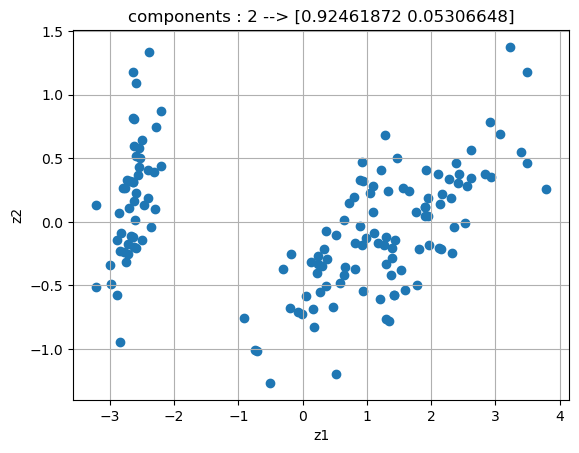

In [26]:
# 2개의 주성분으로 97.7%를 설명한다.
pca = PCA(n_components=2)

# 학습
z = pca.fit_transform(X)

# 시각화
# PC space에서의 데이터 분포 파악
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.title(f'components : 2 --> {pca.explained_variance_ratio_}')
plt.grid()
plt.show()

# KMeans

* 간단한 예제

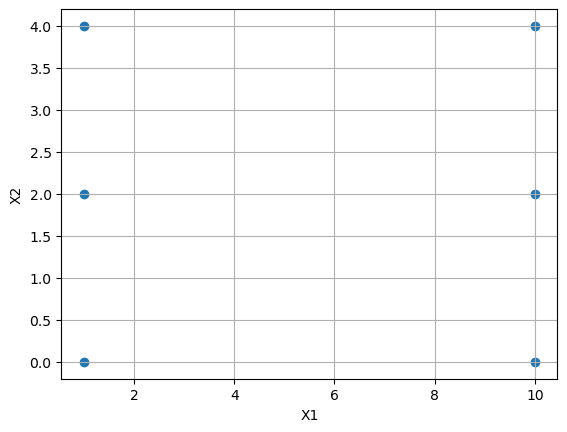

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 0 0 0]


In [27]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# 시각화
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
# plt.title(f'components : 2 --> {pca.explained_variance_ratio_}')
plt.grid()
plt.show()

# fitting
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# cluster 확인하기
print(kmeans.labels_)

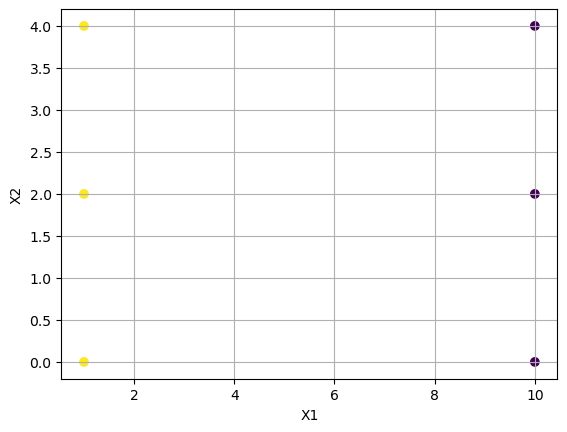

In [28]:
# 시각화
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
# plt.title(f'components : 2 --> {pca.explained_variance_ratio_}')
plt.grid()
plt.show()

* 실데이터 적용

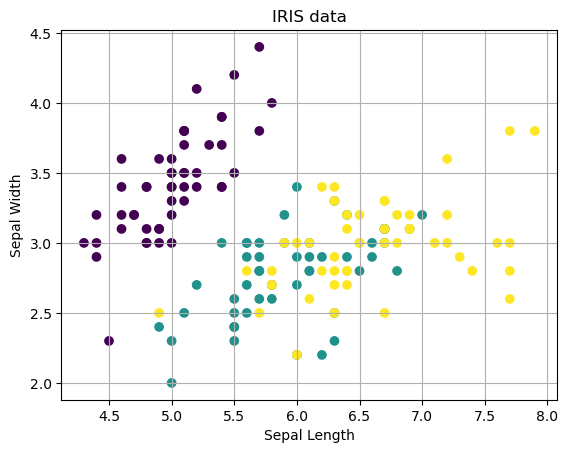

In [31]:
X, y = iris.data, iris.target

# sepal length & width 사용
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IRIS data')
plt.grid()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


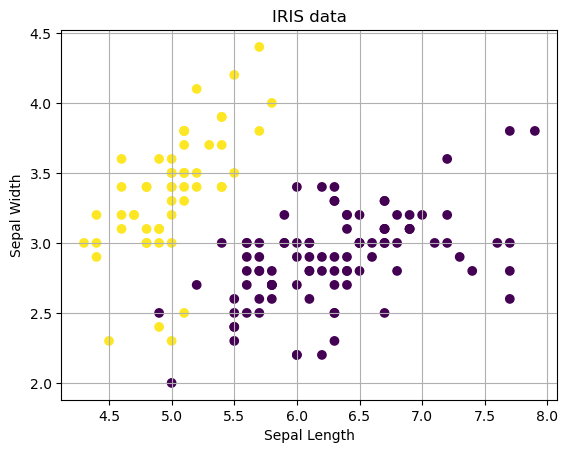

In [34]:
# fitting
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# print(kmeans.labels_)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IRIS data')
plt.grid()
plt.show()